# Introduction to plotting <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **Compatability:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ls8_nbart_geomedian_annual](https://explorer.sandbox.dea.ga.gov.au/ls8_nbart_geomedian_annual)
* **Prerequisites:** Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_Jupyter_notebooks.ipynb)
    * The basic structure of the DEA [satellite datasets](02_DEA.ipynb)
    * Inspecting available [DEA products and measurements](03_Products_and_measurements.ipynb)
    * How to [load data from DEA](04_Loading_data.ipynb)

## Background
Data visualisation is an important component of working with Earth Observation data.
The `xarray` Python package provides a range of straightforward data plotting options which that allow users to quickly generate simple plots from multi-dimensional datasets. 
To generate more complex and informative plots from data loaded from [Digital Earth Australia (DEA)](https://www.ga.gov.au/dea), the DEA Notebooks repository also provides a custom plotting module with additional easy-to-use functionality.

## Description
This introductory notebook demonstrates how to visualise DEA satellite data returned from running a datacube query.
The notebook demonstrates commonly used `xarray` plotting methods, as well as custom functions provided in the [dea_plotting](../Scripts/dea_plotting.py) script.

Topics covered in this notebook include:

* View your area of interest prior to querying the datacube
* Querying the datacube and load some data
* Plotting single band data (e.g. a single satellite band)
    * Selecting and plotting individual timesteps
    * Plotting multiple timesteps
    * Customising plot appearance
* Plotting three-band true or false colour imagery
    * Plotting single timesteps
    * Plotting multiple timesteps
    * Customising plot appearance

***

## Getting started
To run this introduction to plotting data loaded from the datacube, run all the cells in the notebook starting with the "Load packages" cell. For help with running notebook cells, refer back to the [Jupyter Notebooks notebook](01_Jupyter_notebooks.ipynb). 

### Load packages
First we run `%matplotlib inline`, which ensures figures plot correctly in the Jupyter notebook.
We then load the `datacube` package which will allow us to load some data, and a selection of custom DEA functions from the `dea_plotting` script which is located inside the [`dea-notebooks` repository](https://github.com/GeoscienceAustralia/dea-notebooks).

In [1]:
%matplotlib inline

import datacube
import sys

sys.path.append("../Scripts")
from dea_plotting import display_map
from dea_plotting import rgb


### Connect to the datacube
We then connect to the datacube database so we can load DEA data. 

In [2]:
dc = datacube.Datacube(app="05_Plotting")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_range`: The latitude range to analyse (e.g. `(-27.715, -27.755)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `lon_range`: The longitude range to analyse (e.g. `(153.42, 153.46)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `time_range`: The date range to analyse (e.g. `("2013", "2017")`).


In [3]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
time_range = ("2013", "2017")

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The `display_map()` function shows your selected area as a red rectangle on an interactive map.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [4]:
display_map(x=lon_range, y=lat_range)

## Query and view data
The variables determined above are used here to query the DEA datacube using the `dc.load()` function and load data from the introduced in the [Loading data notebook](04_Loading_data.ipynb).
This introduction will continue to use the `ls8_nbart_geomedian_annual` product, as used in the [Loading data notebook](04_Loading_data.ipynb).

In [5]:
ds = dc.load(product="ls8_nbart_geomedian_annual",
             x=lon_range,
             y=lat_range,
             time=time_range)

print(ds)

<xarray.Dataset>
Dimensions:  (time: 5, x: 450, y: 446)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2014-01-01 ... 2017-01-01
  * y        (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x        (x) float64 2.066e+06 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
Data variables:
    blue     (time, y, x) int16 247 258 244 246 231 215 ... 291 287 277 296 324
    green    (time, y, x) int16 365 384 368 363 354 320 ... 394 381 371 397 431
    red      (time, y, x) int16 292 303 288 289 280 237 ... 343 344 315 340 385
    nir      (time, y, x) int16 2492 2614 2572 2559 2479 ... 2049 2140 2226 2351
    swir1    (time, y, x) int16 1064 1085 1040 971 947 ... 1181 1069 1107 1276
    swir2    (time, y, x) int16 468 471 450 419 413 360 ... 587 548 485 494 584
Attributes:
    crs:      EPSG:3577


## Plotting single band images

The `xarray` package provides built-in methods for plotting individual data variables or measurements.
For example, we might want to make a plot for a single measurement like the `swir1` satellite band in the data we loaded above.

To do this, we first need to access the band we are after as an `xarray.DataArray` (to revise the difference between `xarray.Dataset` and `xarray.DataArray` objects, refer back to the [Loading data](04_Loading_data.ipynb) notebook):

In [6]:
print(ds.swir1)

<xarray.DataArray 'swir1' (time: 5, y: 446, x: 450)>
array([[[1064, 1085, ...,   71,   68],
        [1097, 1071, ...,   73,   69],
        ...,
        [ 622,  549, ..., 1022, 1197],
        [1173, 1071, ..., 1042, 1153]],

       [[1113, 1139, ...,   65,   95],
        [1167, 1122, ...,   59,   59],
        ...,
        [ 673,  618, ..., 1055, 1195],
        [1226, 1079, ..., 1021, 1173]],

       ...,

       [[1063, 1078, ...,   56,   57],
        [1135, 1082, ...,   55,   60],
        ...,
        [ 676,  625, ..., 1082, 1199],
        [1378, 1174, ..., 1068, 1220]],

       [[1058, 1062, ...,   54,   54],
        [1058, 1053, ...,   56,   55],
        ...,
        [ 725,  694, ..., 1118, 1231],
        [1345, 1192, ..., 1107, 1276]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2014-01-01 ... 2017-01-01
  * y        (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x        (x) float64 2.066e+06 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06


### Selecting and plotting a single timestep

You can see in the object header that this `xarray.DataArray` has data for five timesteps (i.e. `<xarray.DataArray 'swir1' (time: 5, y: 446, x: 450)>`).
To make a plot for a single timestep only, we need to select it using one of the following options:

1. `.isel()`: This stands for "index selection", and lets us easily select individual timesteps from a dataset by providing the number of the observation we want. 
Counting in Python begins at 0, so to select the first timestep in the `xarray.DataArray` we can specify `.isel(time=0)`:

In [7]:
first_timestep = ds.swir1.isel(time=0)

print(first_timestep)

<xarray.DataArray 'swir1' (y: 446, x: 450)>
array([[1064, 1085, 1040, ...,   74,   71,   68],
       [1097, 1071,  998, ...,   77,   73,   69],
       [1110, 1020,  945, ...,   78,   74,   66],
       ...,
       [1122, 1023,  810, ..., 1077, 1038, 1140],
       [ 622,  549,  697, ..., 1039, 1022, 1197],
       [1173, 1071, 1172, ...,  968, 1042, 1153]], dtype=int16)
Coordinates:
    time     datetime64[ns] 2013-01-01
  * y        (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x        (x) float64 2.066e+06 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
Attributes:
    units:    1
    nodata:   -999
    crs:      EPSG:3577


2. `.sel()`: This allows us to select data using real-world coordinate labels like `time`. 
    For example, we can select the first timestep (i.e. the year 2013) in the `xarray.DataArray` by specifying `.sel(time='2013')`:

In [8]:
first_timestep = ds.swir1.sel(time='2013')

print(first_timestep)

<xarray.DataArray 'swir1' (time: 1, y: 446, x: 450)>
array([[[1064, 1085, ...,   71,   68],
        [1097, 1071, ...,   73,   69],
        ...,
        [ 622,  549, ..., 1022, 1197],
        [1173, 1071, ..., 1042, 1153]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01
  * y        (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x        (x) float64 2.066e+06 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
Attributes:
    units:    1
    nodata:   -999
    crs:      EPSG:3577


We can now use the `.plot()` method to plot `swir1` data for our selected timestep:

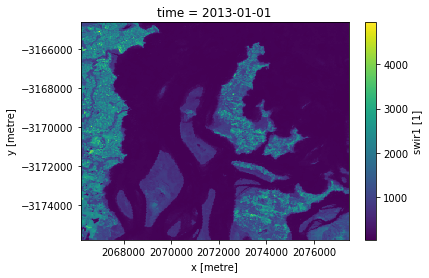

In [9]:
first_timestep.plot()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.
To plot multiple images, we can skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

To plot multiple timesteps in one figure, we need to tell the `.plot()` function to put each timestep in a different column.
We can do this by specifying `.plot(col="time")`:

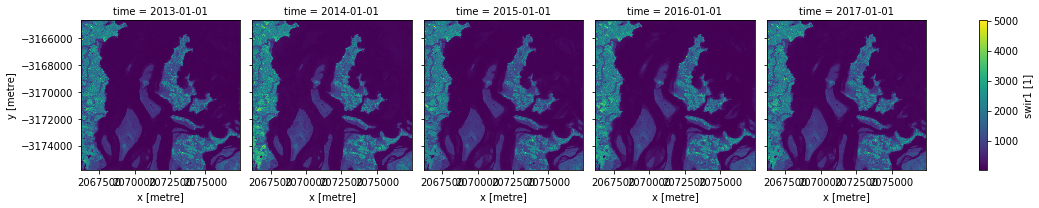

In [10]:
ds.swir1.plot(col="time")

> This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

### Customising plot appearance
You may notice that the plots above are dark and difficult to see clearly.
To improve the appearance of `xarray` plots, you can use the `robust=True` argument to optimise the plot colours by dropping extreme values or outliers:

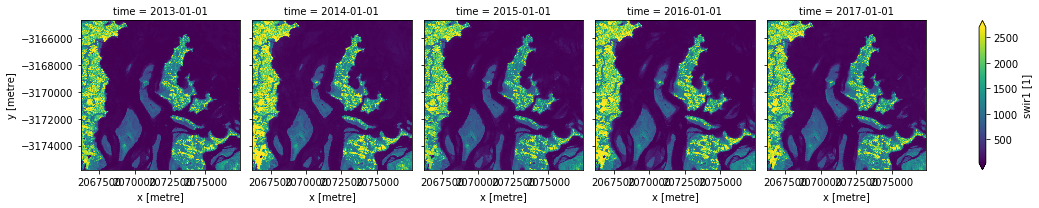

In [11]:
ds.swir1.plot(col="time", robust=True)

We can also easily use custom colour maps/styles to visualise our data using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours are perceived logically by the human eye. 
The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

For example, to plot our data with the perceptually uniform `magma` colour map:


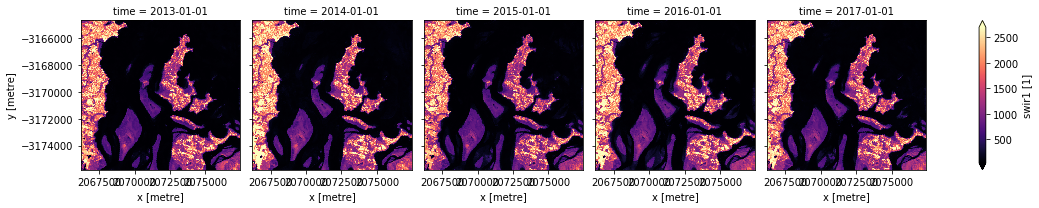

In [12]:
ds.swir1.plot(col="time", robust=True, cmap="magma")

## Plotting true or false colour RGB images

Although `xarray` makes it easy to plot single band images, plotting a colour three band photo-like image is less straightforward.

To make this easier, the `dea-notebooks` repository provides a custom `rgb()` function that is designed for plotting three band images.
The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

Providing the `red`, `green` and `blue` measurements from a dataset will produce a true colour image (akin to how humans view the landscape).
Providing `nir`, `red` and `green` measurements or any other set of three satellite bands from a dataset will produce a false colour image.

> [Learn more about colour rendering](https://en.wikipedia.org/wiki/False_color#True_color).

Hence, the `rgb()` function can be used to visualise the data returned by a query.
It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

### Plotting a single timestep

The time dimension of your `xarray.Dataset` describes how many timesteps exist for your location during your nominated time period.
In the `rgb()` function, the `index` variable is asking for which timesteps you want to view (similar to the `isel()` example above).
Remember: counting in Python begins at 0 so to view the earliest timesteps set `index=0`:

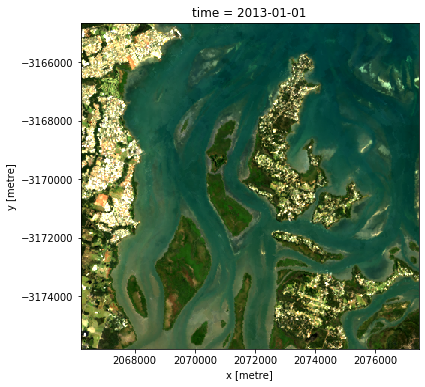

In [13]:
# View a red, green, blue (true colour) image of the first timestep
rgb(ds, bands=["red", "green", "blue"], index=0)

By changing the input bands, we can plot a false colour image which can provide different insights in a landscape.
This band combination (`swir1`, `nir`, `green`) emphasises growing vegetation in green, and water in deep blue:

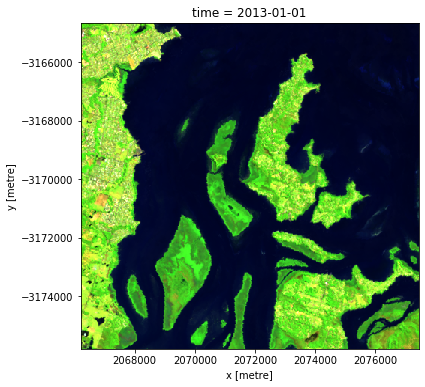

In [14]:
# View a swir1, nir, green (false colour) image of the first timestep
rgb(ds, bands=['swir1', 'nir', 'green'], index=0)

### Plotting multiple timesteps
As discussed in the [single band example above](#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function allows you to do this by providing a list of multiple images to plot using `index=[X, X, ...]`.
For example, we can plot the first and fifth image in our dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

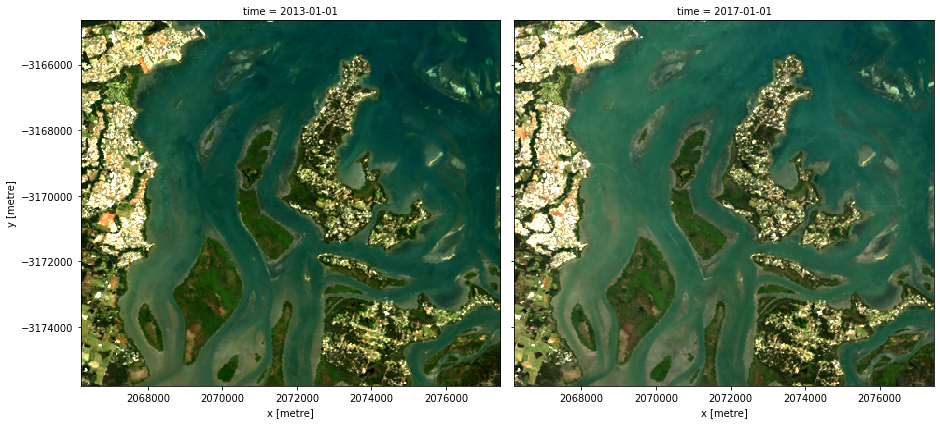

In [15]:
# View a true colour image for the first and fifth timesteps
rgb(ds, bands=['red', 'green', 'blue'], index=[0, 4])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax we demonstrate in the [single band example above](#Plotting-multiple-timesteps): 

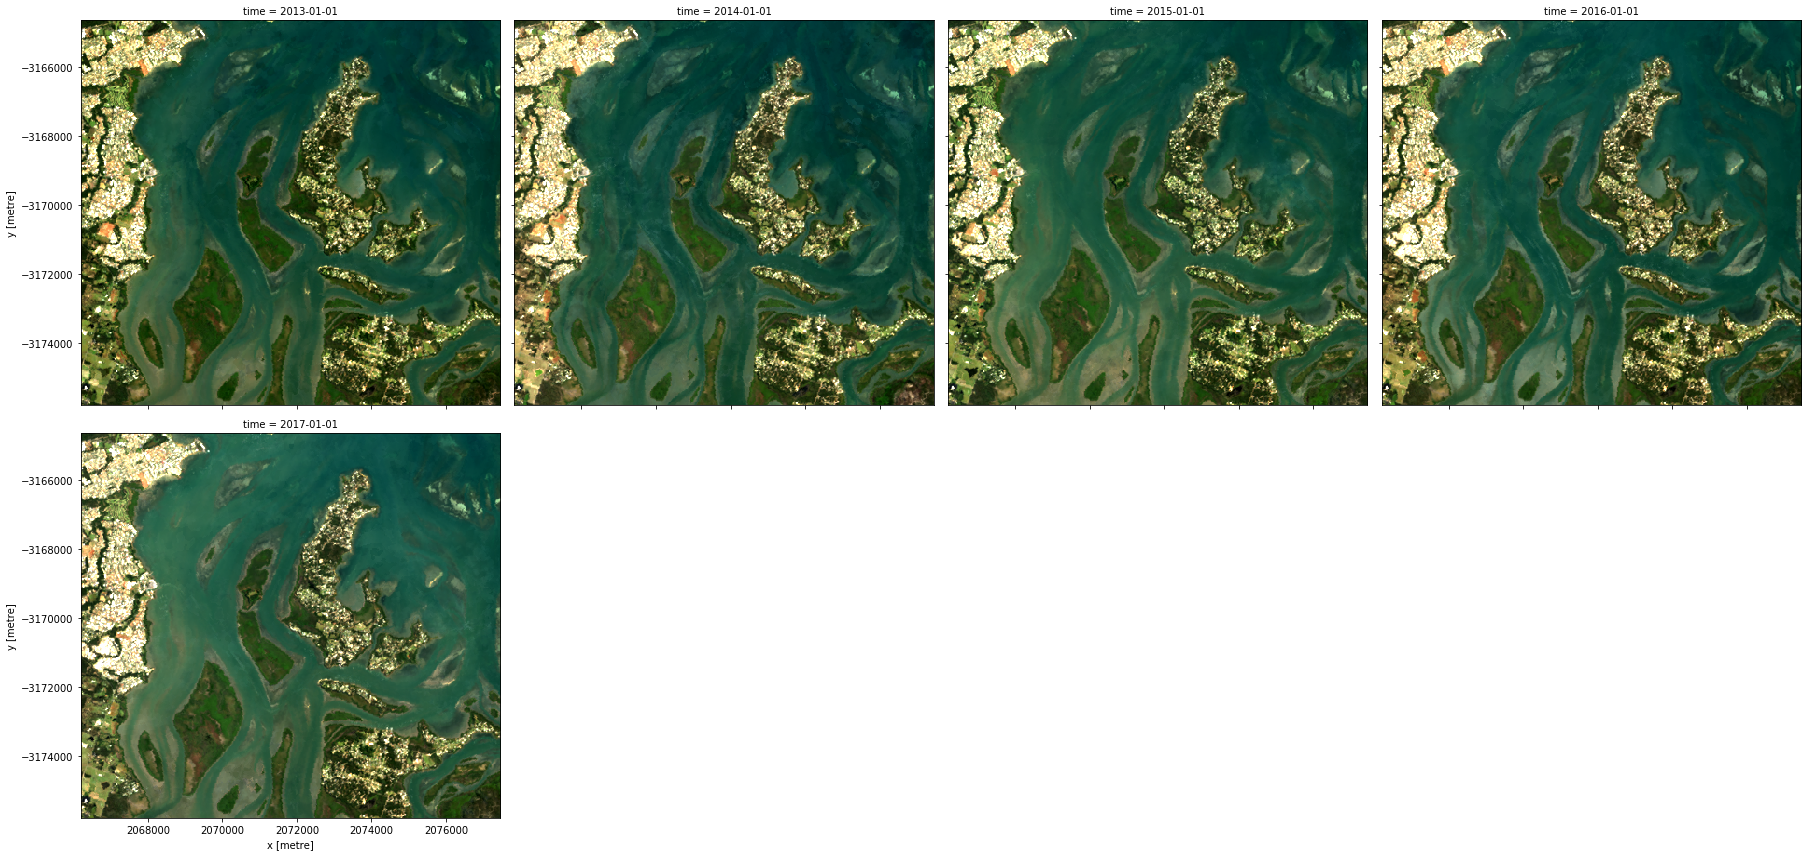

In [16]:
# Plot all timesteps in the dataset
rgb(ds, bands=['red', 'green', 'blue'], col="time")

### Customising plot appearance
By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels.

If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. 
This allows you to remove the most extreme minimum and maximum values in the dataset, which will hopefully improve the contrast and appearance of the plot.

For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

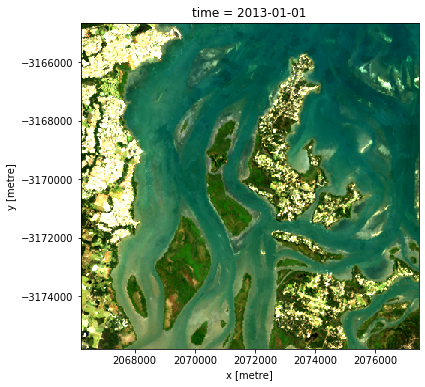

In [17]:
rgb(ds, 
    bands=['red', 'green', 'blue'], 
    index=0, 
    percentile_stretch=[0.05, 0.95])


## Recommended next steps

To continue working through the notebooks in this Beginners guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_Jupyter_notebooks.ipynb)
2. [Digital Earth Australia](02_DEA.ipynb)
3. [Products and Measurements](03_Products_and_measurements.ipynb)
4. [Loading data](04_Loading_data.ipynb)
5. **Plotting (this notebook)**
6. [Basic analysis](06_Basic_analysis.ipynb)

For advanced plotting and visualisation options, see:

* The [dea plotting](../Scripts/dea_plotting.py) Python script containing functions used for plotting and visualising DEA data.

Now that you have completed the first five tutorials, join advanced users in exploring:

* The "DEA_datasets" directory in the repository. Here you can explore DEA products in depth.
* The "Frequently used code" directory containing a recipe book of common techniques and methods for analysing DEA data.
* Continue exploring some with some "Real world applications" which provide more complex workflows and analysis case studies.




***
## Additional information
**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible `datacube` version:** 

In [18]:
print(datacube.__version__)

1.7+128.gebdc898a.dirty


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)